In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [65]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen =ImageDataGenerator(rescale=1./255)

In [66]:
x_train = train_datagen.flow_from_directory(
    r'C:\Users\HP\Documents\DataSet\TRAIN_SET-20221021T095226Z-001\TRAIN_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
x_test = test_datagen.flow_from_directory(
    r'C:\Users\HP\Documents\DataSet\TEST_SET-20221021T095157Z-001\TEST_SET' ,target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')


Found 4118 images belonging to 5 classes.
Found 929 images belonging to 5 classes.


In [67]:
print (x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [68]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [69]:
from collections import Counter as c
c(x_train.labels)



Counter({0: 995, 1: 1354, 2: 1019, 3: 275, 4: 475})

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [71]:
import numpy as np

In [72]:
import tensorflow

In [73]:
from tensorflow.keras.models import Sequential

In [74]:
from tensorflow.keras import layers

In [75]:
from tensorflow.keras.layers import Dense, Flatten

In [76]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [77]:
from keras.preprocessing.image import ImageDataGenerator

In [78]:
model=Sequential()

In [79]:
model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [80]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [81]:
model.add(Flatten())

In [82]:
#model.add(Dense(output_dim=128,activation='relu',init='random_uniform'))

In [83]:
#model.add(Dense(output_dim=1,activation='sigmoid',init='random_uniform'))

In [84]:
classifier = Sequential()

In [85]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [86]:
classifier.add(Conv2D(32, (3, 3), activation='relu'))

 




In [87]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))


In [88]:
classifier.add(Flatten())

In [90]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [91]:
classifier.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [92]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
classifier.fit_generator(
         generator=x_train,steps_per_epoch = len(x_train),
         epochs=10, validation_data=x_test,validation_steps = len(x_test))

C:\Users\HP\AppData\Local\Temp\ipykernel_13540\1881611701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
824/824 [==============================] - 41s 48ms/step - loss: 0.6049 - accuracy: 0.7739 - val_loss: 0.5004 - val_accuracy: 0.8116
Epoch 2/10
824/824 [==============================] - 41s 50ms/step - loss: 0.4198 - accuracy: 0.8473 - val_loss: 0.4984 - val_accuracy: 0.8235
Epoch 3/10
824/824 [==============================] - 43s 52ms/step - loss: 0.3806 - accuracy: 0.8555 - val_loss: 0.4393 - val_accuracy: 0.8332
Epoch 4/10
824/824 [==============================] - 38s 45ms/step - loss: 0.3472 - accuracy: 0.8681 - val_loss: 0.4119 - val_accuracy: 0.8504
Epoch 5/10
824/824 [==============================] - 37s 45ms/step - loss: 0.3323 - accuracy: 0.8779 - val_loss: 0.4166 - val_accuracy: 0.8428
Epoch 6/10
824/824 [==============================] - 37s 44ms/step - loss: 0.3072 - accuracy: 0.8834 - val_loss: 0.4251 - val_accuracy: 0.8428
Epoch 7/10
824/824 [==============================] - 39s 47ms/step - loss: 0.2990 - accuracy: 0.8905 - val_loss: 0.5612 - val_accuracy:

In [94]:
classifier.save('nutrition.h5')

In [95]:
from tensorflow.keras.models import load_model

In [96]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image 
model = load_model("nutrition.h5")

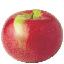

In [97]:
img = image.load_img(r"E:\Flask\Sample_Images-20221104T061454Z-001\Sample_Images\Test_Image1.jpg", grayscale=False,target_size= (64,64))
img


In [98]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x)) 
pred

1/1 [==============================] - 0s 241ms/step


0

In [99]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'APPLES'